# Topic Modeling
## Author : Eren ERİS

In [21]:
#Bu veri setiyle konu içeriği ile konu arasındaki ilişkiği tespit etmek için kullanılan modeldir.
#This is the model used to determine the relationship between the subject content and the subject with the data set.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv("articles.csv", encoding = 'latin1')

In [4]:
df.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [5]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    # Join tokens to form preprocessed text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [7]:
df['Article'] = df['Article'].apply(preprocess_text)

In [8]:
df.head()

,Article,Title
0,data analysis process inspecting exploring dat...,Best Books to Learn Data Analysis
1,performance machine learning algorithm particu...,Assumptions of Machine Learning Algorithms
2,must seen news divided category go news websit...,News Classification with Machine Learning
3,two class classification problem problem binar...,Multiclass Classification Algorithms in Machin...
4,multinomial naive bayes one variant naive baye...,Multinomial Naive Bayes in Machine Learning


In [13]:
 def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

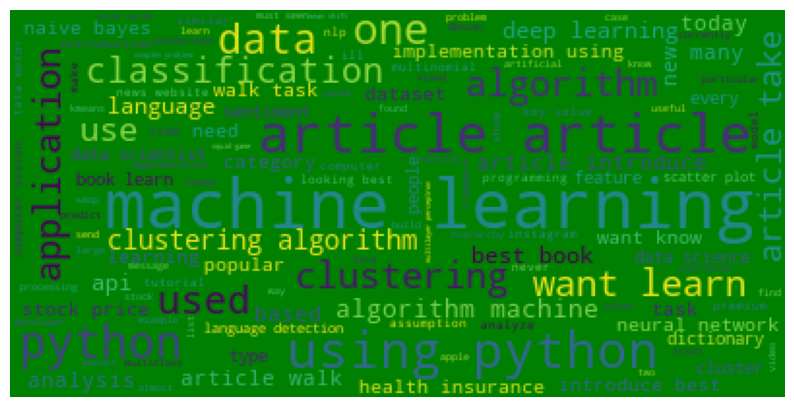

In [14]:
wc(df["Article"],'green')

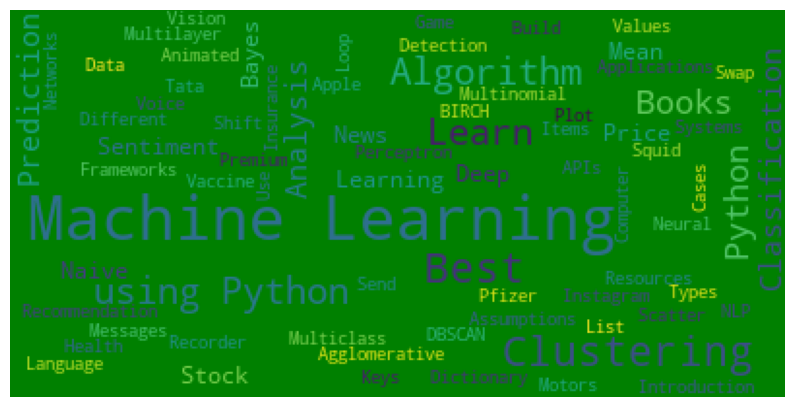

In [15]:
wc(df["Title"],'green')

In [17]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Article'].values)

In [18]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(x)

topic_modelling = lda.transform(x)

topic_labels = np.argmax(topic_modelling, axis=1)
df['topic_labels'] = topic_labels

In [19]:
df.head()

,Article,Title,topic_labels
0,data analysis process inspecting exploring dat...,Best Books to Learn Data Analysis,2
1,performance machine learning algorithm particu...,Assumptions of Machine Learning Algorithms,3
2,must seen news divided category go news websit...,News Classification with Machine Learning,1
3,two class classification problem problem binar...,Multiclass Classification Algorithms in Machin...,3
4,multinomial naive bayes one variant naive baye...,Multinomial Naive Bayes in Machine Learning,1
